In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
"""### Loading Dataset"""

'### Loading Dataset'

We are using Fraud_test dataset as a whole and dropping 1st column 'Unnamed' as it was irrelevant

In [6]:
df = pd.read_csv(r'fraudTest.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
"""### Inspecting Data"""

'### Inspecting Data'

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [9]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [10]:
#Checking null values
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [11]:
"""#### No Null values in our data"""

'#### No Null values in our data'

In [12]:
df.shape

(555719, 22)

In [13]:
"""### Distribution of Dependent Variable"""

'### Distribution of Dependent Variable'

In [14]:
df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [15]:
df['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [16]:
"""This is highly imbalanced class data, so later we need to balance the dependent variable"""

'This is highly imbalanced class data, so later we need to balance the dependent variable'

In [17]:
#Finding unique values in each column
df.nunique()

trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [18]:
"""### Converting data type of trans_date_trans_time to datetime"""

'### Converting data type of trans_date_trans_time to datetime'

In [19]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [20]:
df.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [21]:
"""### Deriving 'Transaction Hour' Feature from 'Transaction Time' Feature"""

"### Deriving 'Transaction Hour' Feature from 'Transaction Time' Feature"

In [22]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0         12
1         12
2         12
3         12
4         12
          ..
555714    23
555715    23
555716    23
555717    23
555718    23
Name: trans_hour, Length: 555719, dtype: int32

In [23]:
"""### Deriving 'Day of Week' Feature from 'Transaction Time' Feature"""

"### Deriving 'Day of Week' Feature from 'Transaction Time' Feature"

In [24]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0           Sunday
1           Sunday
2           Sunday
3           Sunday
4           Sunday
            ...   
555714    Thursday
555715    Thursday
555716    Thursday
555717    Thursday
555718    Thursday
Name: day_of_week, Length: 555719, dtype: object

In [25]:
"""### Deriving 'Year Month' Feature from 'Transaction Time' Feature

"""

"### Deriving 'Year Month' Feature from 'Transaction Time' Feature\n\n"

In [26]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0         2020-06
1         2020-06
2         2020-06
3         2020-06
4         2020-06
           ...   
555714    2020-12
555715    2020-12
555716    2020-12
555717    2020-12
555718    2020-12
Name: year_month, Length: 555719, dtype: period[M]

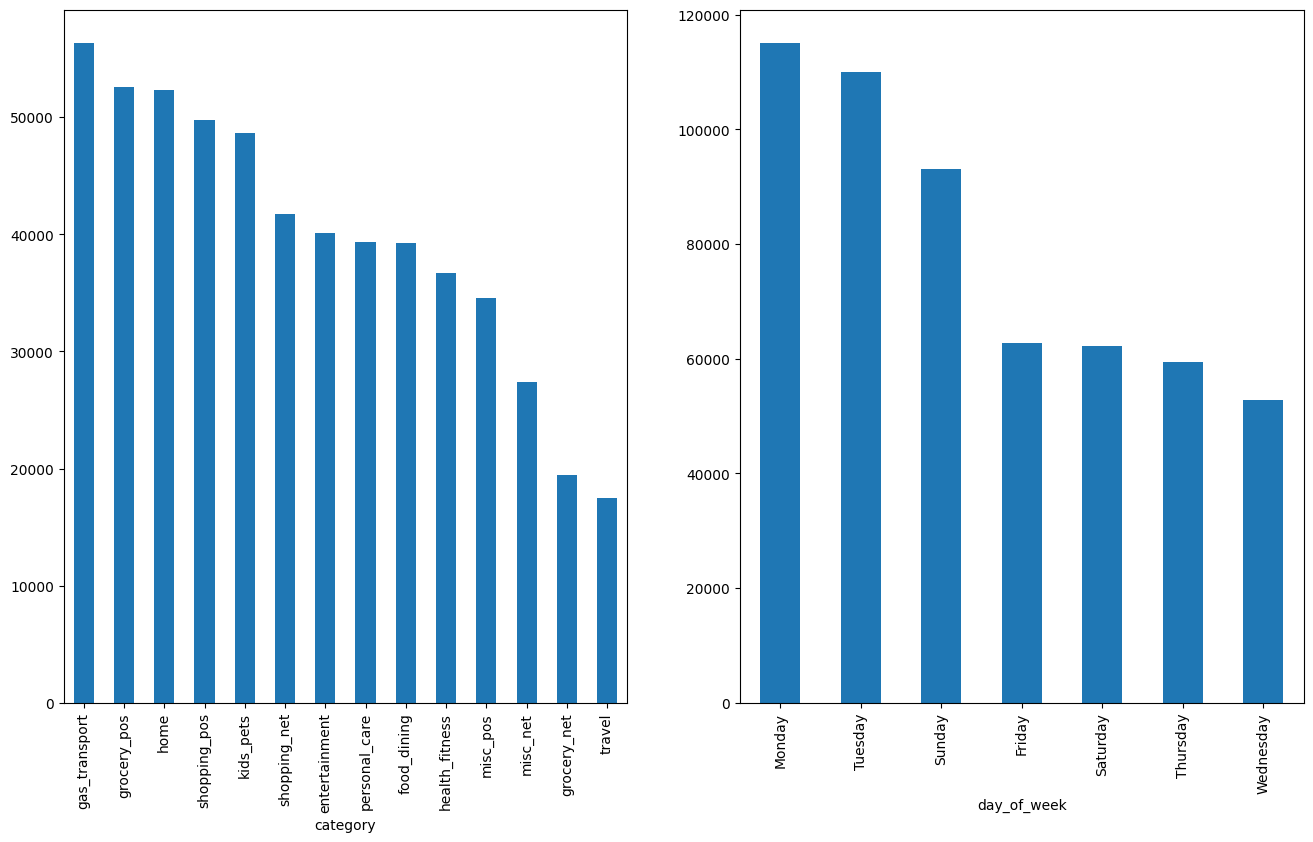

In [27]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar();

In [28]:
"""- Monday and Tuesday of the week have highest credit card transactions
- gas_transport and grocery_pos have highest credit card transactions
"""

'- Monday and Tuesday of the week have highest credit card transactions\n- gas_transport and grocery_pos have highest credit card transactions\n'

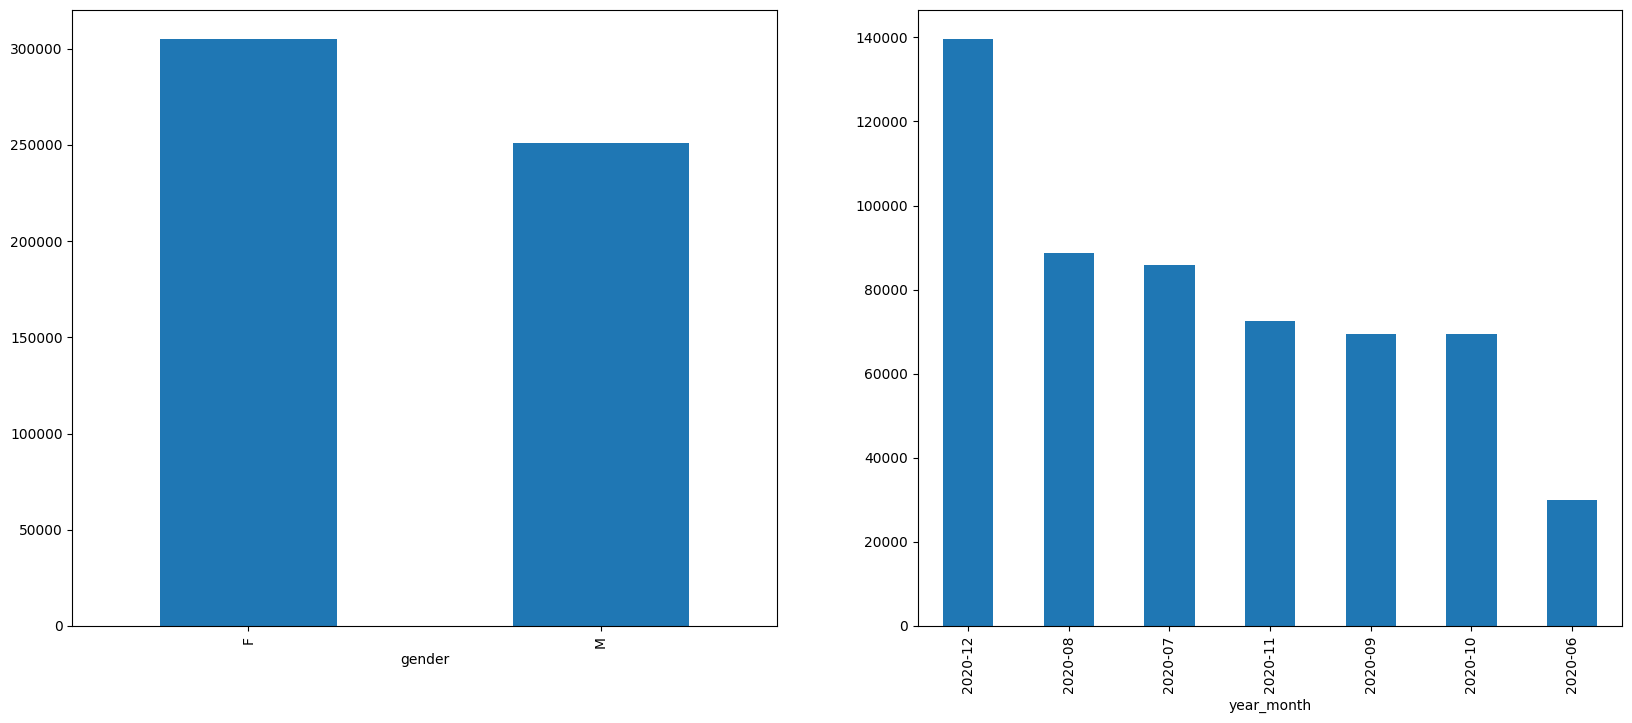

In [29]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
df['year_month'].value_counts().plot.bar();

In [30]:
"""- Highest number of Transactions are in month of December and Lowest number of Transactions happened in June

### Derive Age of the Customer:

Age of Customer = Transaction Date - DOB
"""

'- Highest number of Transactions are in month of December and Lowest number of Transactions happened in June\n\n### Derive Age of the Customer:\n\nAge of Customer = Transaction Date - DOB\n'

In [31]:
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y'))
df['age'].describe()

ValueError: Unit Y is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'

In [ ]:
print("Minimum age of customer is", df['age'].min())
print("Maximum age of customer is", df['age'].max())

Minimum age of customer is 15.0
Maximum age of customer is 96.0


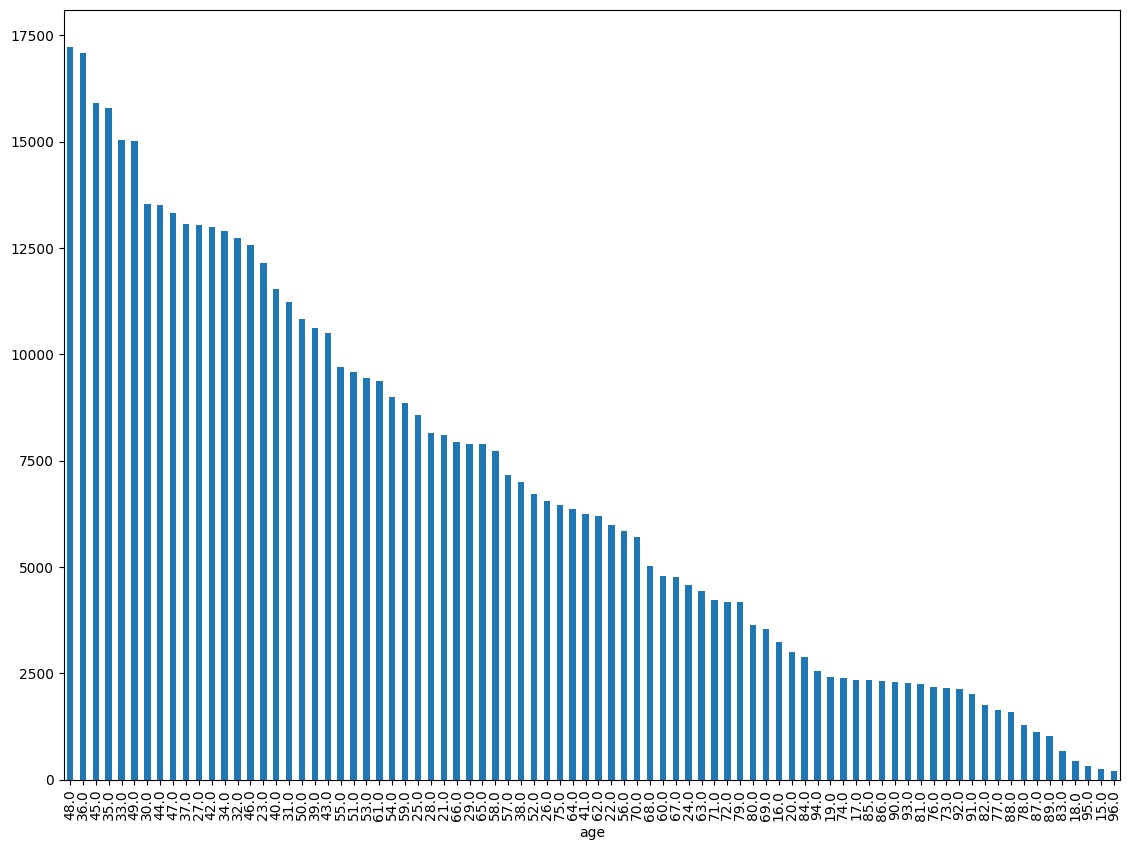

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
df['age'].value_counts().plot.bar();

In [ ]:
"""### Deriving counts for each state and Job category"""

'### Deriving counts for each state and Job category'

In [ ]:
df.state.value_counts()

state
TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: count, dtype: int64

In [ ]:
df.job.value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [ ]:
"""##### Distribution of amt"""

'##### Distribution of amt'

In [ ]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amount Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amount Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})],
axis=1
)

,Row Type,Overall Amount Distribution,Non Fraud Amount Distribution,Fraud Amount Distribution
0,count,555719.000000,553574.000000,2145.000000
1,mean,69.392810,67.614408,528.356494
2,std,156.745941,152.471931,392.747594
3,min,1.000000,1.000000,1.780000
4,50%,47.290000,47.150000,371.940000
5,95%,193.051000,188.870000,1084.108000
6,99.9%,1572.723500,1575.960200,1311.443760
7,max,22768.110000,22768.110000,1320.920000


In [ ]:
"""Fraud Transaction mean is way higher than non-fraud transaction

Mean of Non Fraud Transactions: 67.6

Mean of Fraud Transactions: 528.3
"""

'Fraud Transaction mean is way higher than non-fraud transaction\n\nMean of Non Fraud Transactions: 67.6\n\nMean of Fraud Transactions: 528.3\n'

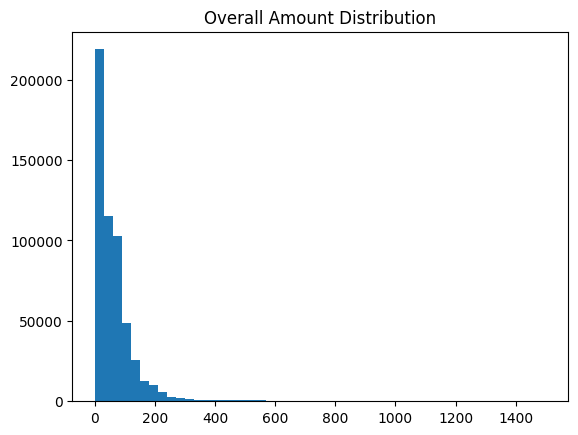

In [ ]:
plt.hist(df[df['amt']<=1500]['amt'], bins=50)
plt.title('Overall Amount Distribution');

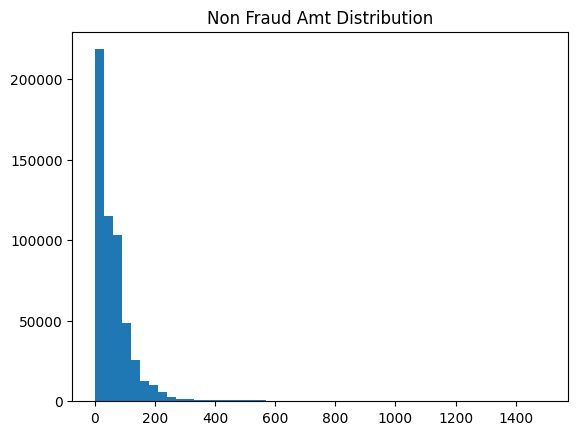

In [ ]:
plt.hist(df[(df['is_fraud']==0) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Non Fraud Amt Distribution');

Text(0.5, 1.0, 'Fraud Amt Distribution')

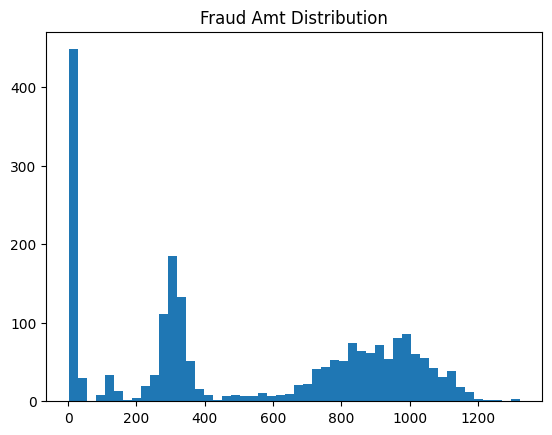

In [ ]:
plt.hist(df[(df['is_fraud']==1) & (df['amt']<=1500)]['amt'], bins=50)
plt.title('Fraud Amt Distribution')

<Axes: ylabel='amt'>

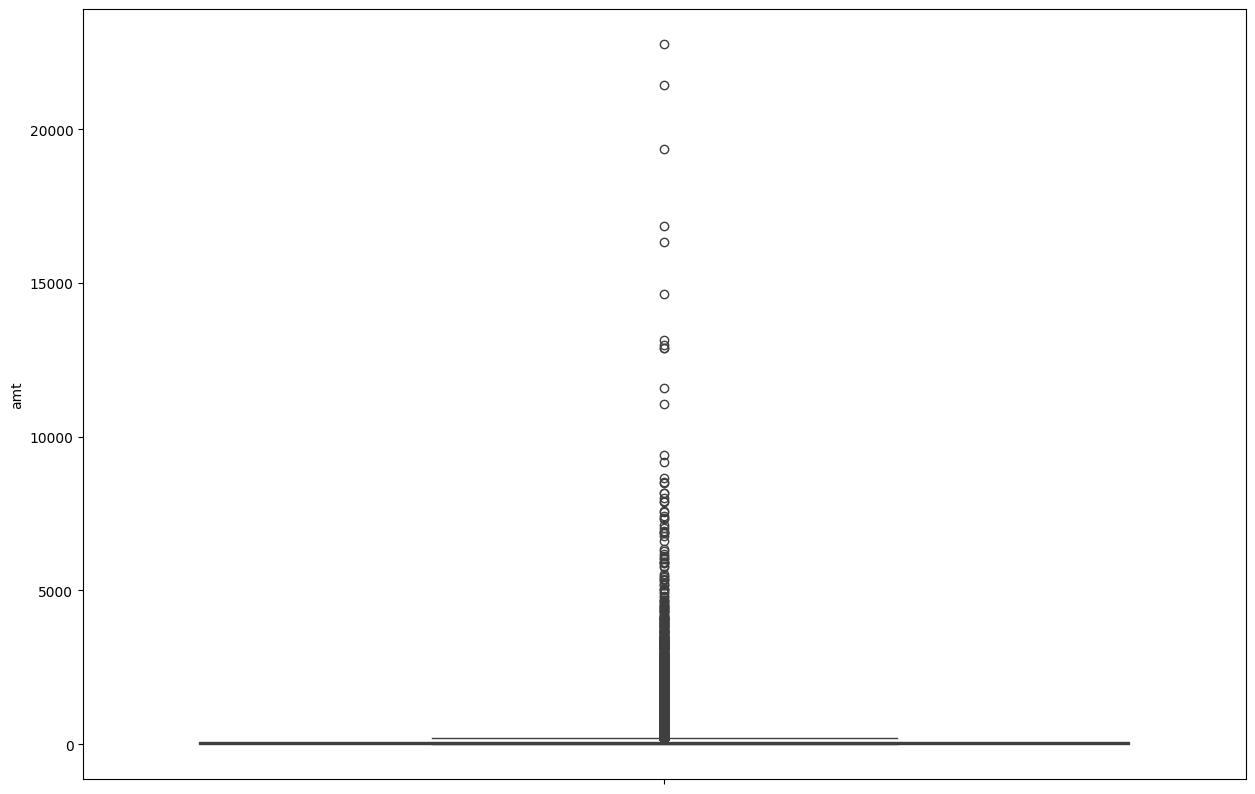

In [ ]:
plt.figure(figsize=[15,10])
sns.boxplot(df['amt'])

In [ ]:
df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_hour                        int32
day_of_week                      object
year_month                    period[M]


In [ ]:
"""## Dropping irrelevant columns:"""

'## Dropping irrelevant columns:'

In [ ]:
df.drop(columns=['zip', 'lat', 'long', 'unix_time', 'merch_lat', 'merch_long'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'city_pop', 'job',
       'dob', 'trans_num', 'is_fraud', 'trans_hour', 'day_of_week',
       'year_month', 'age'],
      dtype='object')

In [ ]:
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

In [ ]:
df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

In [ ]:
pd.crosstab(df['gender'], df['is_fraud'])

is_fraud,0,1
gender,,
F,303722,1164
M,249852,981


In [ ]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

In [ ]:
df_fraud_gender

,Gender,is_fraud,count
0,F,0,303722
1,F,1,1164
2,M,0,249852
3,M,1,981


In [ ]:
"""##### Category"""

'##### Category'

In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

In [ ]:
df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

In [ ]:
df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,56370,10.143616
4,grocery_pos,52553,9.456758
6,home,52345,9.419329
12,shopping_pos,49791,8.959744
7,kids_pets,48692,8.761982
11,shopping_net,41779,7.518008
0,entertainment,40104,7.216597
10,personal_care,39327,7.076778
1,food_dining,39268,7.066161
5,health_fitness,36674,6.599378


In [ ]:
"""Gas_transport holds for the maximum no.of the transactions"""

'Gas_transport holds for the maximum no.of the transactions'

<BarContainer object of 14 artists>

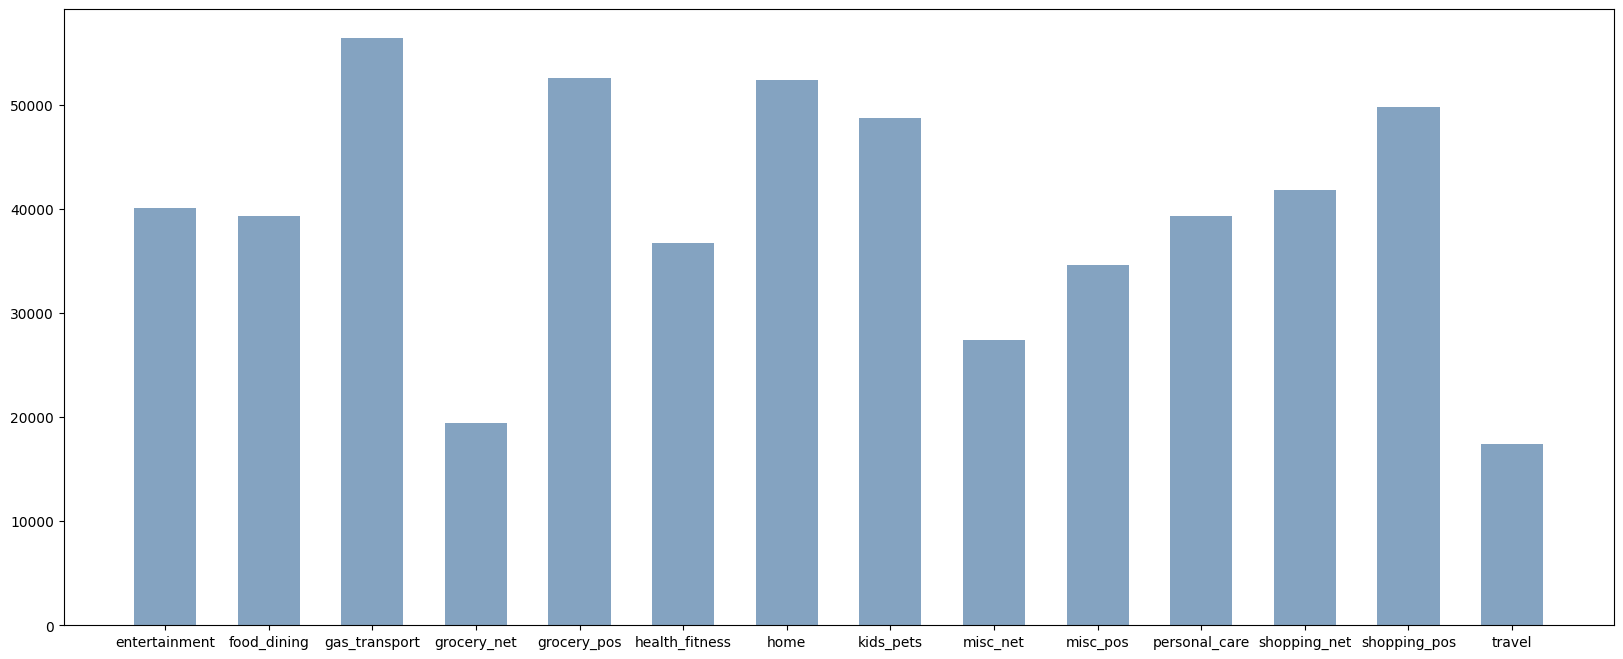

In [ ]:
fig = plt.figure(figsize = (20,8))
plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.6)

In [ ]:
plt.show()

In [ ]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

In [ ]:
df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')

In [ ]:
df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [ ]:
df_fraud_category.sort_values(by = ['count'], ascending=True)

,Category,is_fraud,count,category_count,percent,percent_grp
27,travel,1,40,17449,3.139896,0.229239
7,grocery_net,1,41,19426,3.495652,0.211057
11,health_fitness,1,52,36674,6.599378,0.141790
3,food_dining,1,54,39268,7.066161,0.137517
1,entertainment,1,59,40104,7.216597,0.147117
15,kids_pets,1,65,48692,8.761982,0.133492
13,home,1,67,52345,9.419329,0.127997
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
5,gas_transport,1,154,56370,10.143616,0.273195


In [ ]:
"""#### grocery_pos and shopping_net has more number of fraud transactions compared to other categories"""

'#### grocery_pos and shopping_net has more number of fraud transactions compared to other categories'

In [ ]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
13,home,1,67,52345,9.419329,0.127997
15,kids_pets,1,65,48692,8.761982,0.133492
3,food_dining,1,54,39268,7.066161,0.137517
11,health_fitness,1,52,36674,6.599378,0.141790
1,entertainment,1,59,40104,7.216597,0.147117
21,personal_care,1,70,39327,7.076778,0.177995
19,misc_pos,1,72,34574,6.221490,0.208249
7,grocery_net,1,41,19426,3.495652,0.211057
27,travel,1,40,17449,3.139896,0.229239
5,gas_transport,1,154,56370,10.143616,0.273195


<BarContainer object of 14 artists>

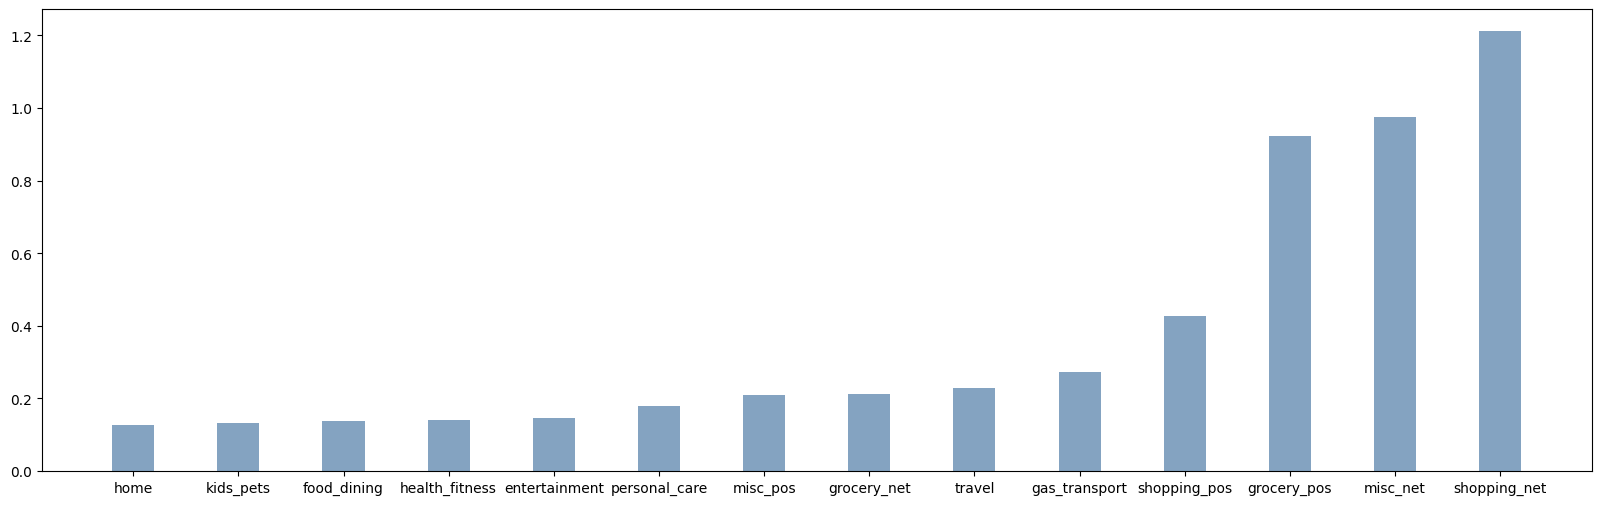

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),
        width = 0.4)

In [ ]:
plt.show()

In [ ]:
"""### According to the percentage group, Shopping net and Misc_net have highest no. of fraud transactions.

##### Merchant
"""

'### According to the percentage group, Shopping net and Misc_net have highest no. of fraud transactions.\n\n##### Merchant\n'

In [ ]:
df.merchant.value_counts(normalize=True, ascending=False)

merchant
fraud_Kilback LLC                        0.003345
fraud_Cormier LLC                        0.002874
fraud_Schumm PLC                         0.002809
fraud_Kuhn LLC                           0.002737
fraud_Dickinson Ltd                      0.002733
                                           ...   
fraud_Treutel-King                       0.000581
fraud_Satterfield-Lowe                   0.000574
fraud_Kessler Group                      0.000572
fraud_Jerde-Hermann                      0.000561
fraud_Ritchie, Bradtke and Stiedemann    0.000547
Name: proportion, Length: 693, dtype: float64

In [ ]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

In [ ]:
df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

In [ ]:
df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,1859,0.334522
105,fraud_Cormier LLC,1597,0.287375
571,fraud_Schumm PLC,1561,0.280897
349,fraud_Kuhn LLC,1521,0.273699
136,fraud_Dickinson Ltd,1519,0.273340
...,...,...,...
633,fraud_Treutel-King,323,0.058123
544,fraud_Satterfield-Lowe,319,0.057403
306,fraud_Kessler Group,318,0.057223
286,fraud_Jerde-Hermann,312,0.056143


In [ ]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

In [ ]:
df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')

In [ ]:
df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
df_fraud_merchant['percent_grp']

0        99.875467
1         0.124533
2        99.738903
3         0.261097
4       100.000000
           ...    
1245      0.538358
1246     99.827586
1247      0.172414
1248     99.756691
1249      0.243309
Name: percent_grp, Length: 1250, dtype: float64

In [ ]:
df_fraud_merchant[df_fraud_merchant['is_fraud'] == 1].sort_values(by = ['percent_grp'],ascending=False)

,Merchant,is_fraud,count,merchant_count,percent,percent_grp
957,"fraud_Romaguera, Cruickshank and Greenholt",1,18,828,0.148996,2.173913
703,fraud_Lemke-Gutmann,1,18,837,0.150616,2.150538
805,"fraud_Mosciski, Ziemann and Farrell",1,18,870,0.156554,2.068966
439,"fraud_Heathcote, Yost and Kertzmann",1,17,830,0.149356,2.048193
947,"fraud_Rodriguez, Yost and Jenkins",1,10,501,0.090153,1.996008
...,...,...,...,...,...,...
708,"fraud_Lind, Huel and McClure",1,1,1125,0.202440,0.088889
425,fraud_Harris Inc,1,1,1138,0.204780,0.087873
902,"fraud_Raynor, Feest and Miller",1,1,1152,0.207299,0.086806
994,"fraud_Schaefer, McGlynn and Bosco",1,1,1163,0.209278,0.085985


In [ ]:
"""##### One Hot-Encoding"""

'##### One Hot-Encoding'

In [ ]:
category_onehot = pd.get_dummies(df.category, prefix='category', drop_first=True)
gender_onehot = pd.get_dummies(df.gender, prefix='gender', drop_first=True)
day_of_week_onehot = pd.get_dummies(df.day_of_week, prefix='day_of_week', drop_first=True)


In [ ]:
df1 = pd.concat([df, category_onehot,gender_onehot,day_of_week_onehot], axis=1)
df1.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,False,False,False,True,False,False,True,False,False,False
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,False,False,False,False,False,False,True,False,False,False
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,False,False,False,False,False,False,True,False,False,False
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,False,False,False,True,False,False,True,False,False,False
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,False,False,True,True,False,False,True,False,False,False


In [ ]:

"""##### Test-Train Split"""

'##### Test-Train Split'

In [ ]:
X_cols = ['amt','city_pop', 'trans_hour',
       'age', 'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_M','day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday']

In [ ]:
Y_cols = ['is_fraud']

In [ ]:
#Importing Library
from sklearn.model_selection import train_test_split

In [ ]:
"""##### Oversampling"""

'##### Oversampling'

In [ ]:
#As this dataset is highly imbalance we have to balance this by over sampling
cnt_non_fraud = df1[df1['is_fraud'] == 0]['amt'].count()
df1_class_fraud = df1[df1['is_fraud'] == 1]
df1_class_nonfraud = df1[df1['is_fraud'] == 0]

In [ ]:
#OverSampling
df1_class_fraud_oversample = df1_class_fraud.sample(cnt_non_fraud, replace=True)
df1_oversampled = pd.concat([df1_class_nonfraud, df1_class_fraud_oversample], axis=0)

In [ ]:
print('Random over-sampling:')
print(df1_oversampled['is_fraud'].value_counts())

Random over-sampling:
is_fraud
0    553574
1    553574
Name: count, dtype: int64


In [ ]:
df1_oversampled.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,category_shopping_net,category_shopping_pos,category_travel,gender_M,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,2020-06-21 12:14:00,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,False,False,False,True,False,False,True,False,False,False
1,2020-06-21 12:14:00,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,False,False,False,False,False,False,True,False,False,False
2,2020-06-21 12:14:00,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,False,False,False,False,False,False,True,False,False,False
3,2020-06-21 12:15:00,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,False,False,False,True,False,False,True,False,False,False
4,2020-06-21 12:15:00,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,False,False,True,True,False,False,True,False,False,False


In [ ]:
"""####  Train and test split"""

'####  Train and test split'

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df1_oversampled[X_cols],df1_oversampled[Y_cols] , train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
X_train.shape


(775003, 24)

In [ ]:
X_test.shape

(332145, 24)

In [ ]:
"""#### Logistic Regression"""

'#### Logistic Regression'

In [ ]:
#Importing Library
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression(random_state=42)

Building Logistic Regression  Model

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_test.is_fraud

131272    1
405047    1
195542    0
499719    1
401780    1
         ..
354225    1
208038    0
34756     0
136114    1
56556     1
Name: is_fraud, Length: 332145, dtype: int64

In [ ]:
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[359273  28312]
 [ 98895 288523]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    387585
           1       0.91      0.74      0.82    387418

    accuracy                           0.84    775003
   macro avg       0.85      0.84      0.83    775003
weighted avg       0.85      0.84      0.83    775003



In [ ]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[153772  12217]
 [ 42113 124043]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    165989
           1       0.91      0.75      0.82    166156

    accuracy                           0.84    332145
   macro avg       0.85      0.84      0.84    332145
weighted avg       0.85      0.84      0.84    332145



In [ ]:
accuracy_score(y_test,y_test_pred)

0.8364268617621822

In [ ]:
#Accuracy on test data when we build logistic regression model is 0.83.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf=2, max_depth=30, criterion='entropy')
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9993195742823164

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[165763,    226],
       [     0, 166156]])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    165989\n           1       1.00      1.00      1.00    166156\n\n    accuracy                           1.00    332145\n   macro avg       1.00      1.00      1.00    332145\nweighted avg       1.00      1.00      1.00    332145\n'

In [ ]:
#Accuracy on test data when we build decision tree model is 0.99

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndf=RandomForestClassifier(n_estimators=100,criterion='gini',random_state=45)
rfc=rndf.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.9998434418702675

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[165937,     52],
       [     0, 166156]])

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00    165989\n           1       1.00      1.00      1.00    166156\n\n    accuracy                           1.00    332145\n   macro avg       1.00      1.00      1.00    332145\nweighted avg       1.00      1.00      1.00    332145\n'

In [ ]:
#Accuracy on test data when we build RandomForestClassifier is 1.00

In [ ]:
"""applied algorithm model results:
model : logistic regression
Accuracy : 85%
precision: 78%
recall   : 84%
f1-score : 85%

Model : Decision Tree
accuracy : 99%
precision: 100%
recall   : 100%
f1-score : 100%

Model: RandomForest
accuracy : 100%
precision: 100%
recall   : 100%
f1-score : 100%
"""

'applied algorithm model results:\nmodel : logistic regression\nAccuracy : 85%\nprecision: 78%\nrecall   : 84%\nf1-score : 85%\n\nModel : Decision Tree\naccuracy : 99%\nprecision: 100%\nrecall   : 100%\nf1-score : 100%\n\nModel: RandomForest\naccuracy : 100%\nprecision: 100%\nrecall   : 100%\nf1-score : 100%\n'

Conclusion:
Random Forest is the best ML model.IT provides high test accuracy,low False negatives,high precision and recall score.